# Libraries used


In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE



# Preprocessing

In [2]:
raw_df = pd.read_csv("BankChurners.csv")
raw_df.drop(raw_df.columns[-2:], axis = 1, inplace= True)
raw_df.drop(raw_df.columns[0], axis =1, inplace= True)
raw_df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

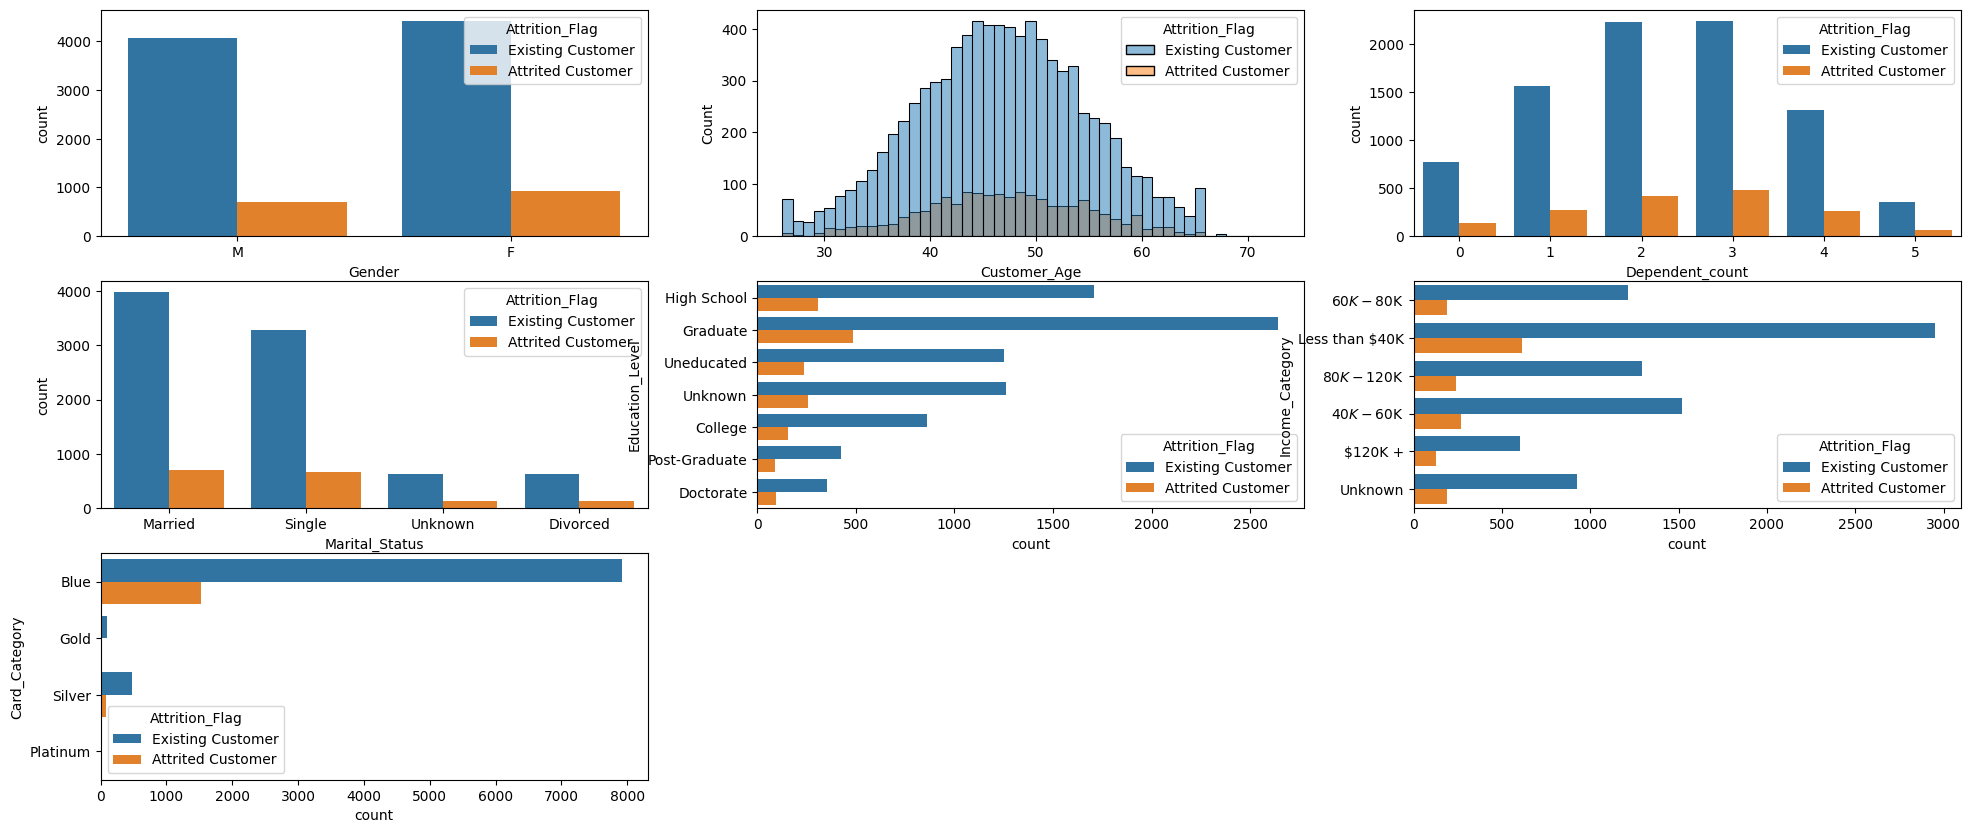

In [3]:
plt.figure(figsize=(24, 10))

plt.subplot(3,3,1)
sns.countplot(x=raw_df['Gender'], hue=raw_df['Attrition_Flag'])

plt.subplot(3,3,2)
sns.histplot(x=raw_df['Customer_Age'], hue=raw_df['Attrition_Flag'])

plt.subplot(3,3,3)
sns.countplot(x=raw_df['Dependent_count'], hue=raw_df['Attrition_Flag'])

plt.subplot(3,3,4)
sns.countplot(x=raw_df['Marital_Status'], hue=raw_df['Attrition_Flag'])

plt.subplot(3,3,5)
sns.countplot(y=raw_df['Education_Level'], hue=raw_df['Attrition_Flag'])

plt.subplot(3,3,6)
sns.countplot(y=raw_df['Income_Category'], hue=raw_df['Attrition_Flag'])

plt.subplot(3,3,7)
sns.countplot(y=raw_df['Card_Category'], hue=raw_df['Attrition_Flag'])
plt.show()

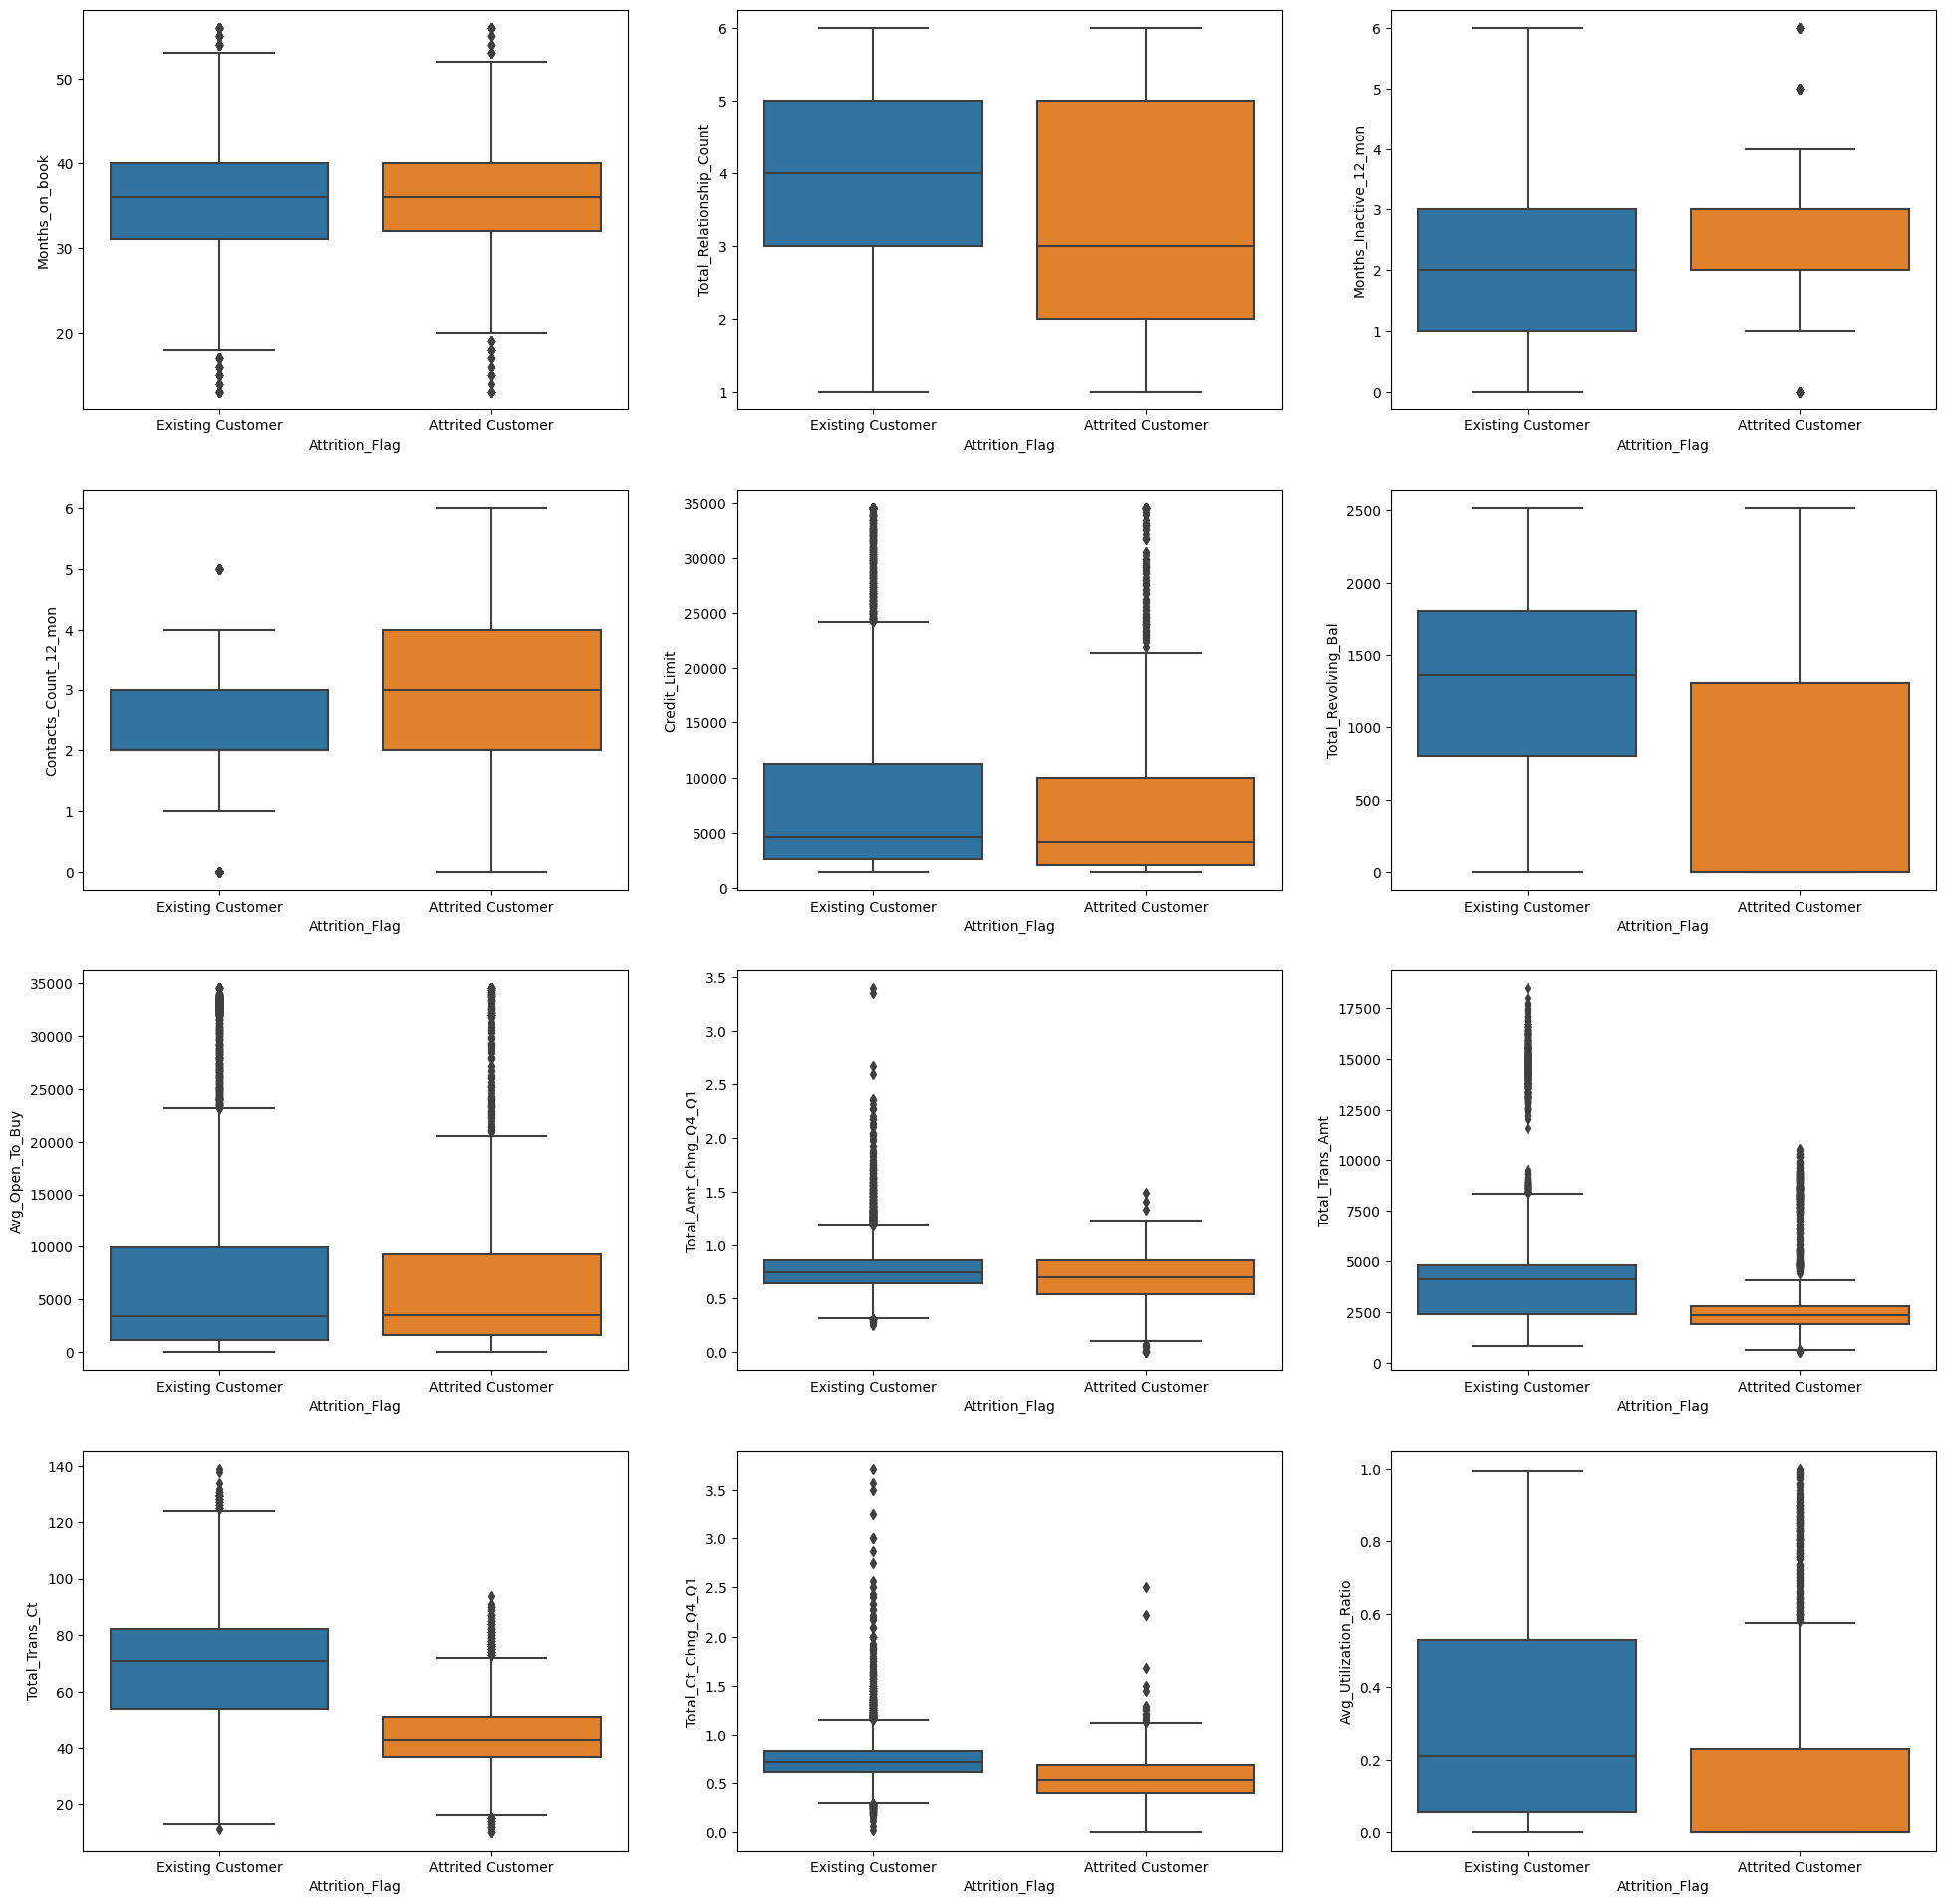

In [4]:
#Features scaling
numeric_features = ['Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

plt.figure(figsize=(24, 24))

i = 1
for feature in numeric_features:
    plt.subplot(4,3,i)
    sns.boxplot(y=raw_df[feature], x=raw_df['Attrition_Flag'])
    i +=1

plt.show()

In [5]:

minmax_normalizer = MinMaxScaler()
df = raw_df.copy()
df[numeric_features] = minmax_normalizer.fit_transform(df[numeric_features])

In [6]:
#Encoding target
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

#Grouping customer age
age_bins = [25, 35, 45, 55, 65, 100]
age_groups = ['25-34', '35-44', '45-55', '55-65', '65+']
df['Customer_Age_Group'] = pd.cut(df['Customer_Age'], bins=age_bins, labels=age_groups)

#Categorical encoding
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Customer_Age_Group']
#Label Encoding
label_encoder = LabelEncoder()
df[categorical_features] = df[categorical_features].apply(label_encoder.fit_transform)

# #Onehot Encoding
# onehot_enc = OneHotEncoder()
# encoded_feature = pd.DataFrame(onehot_enc.fit_transform(df[categorical_features]))
# df_encoded = pd.concat(df, encoded_feature, axis=1)

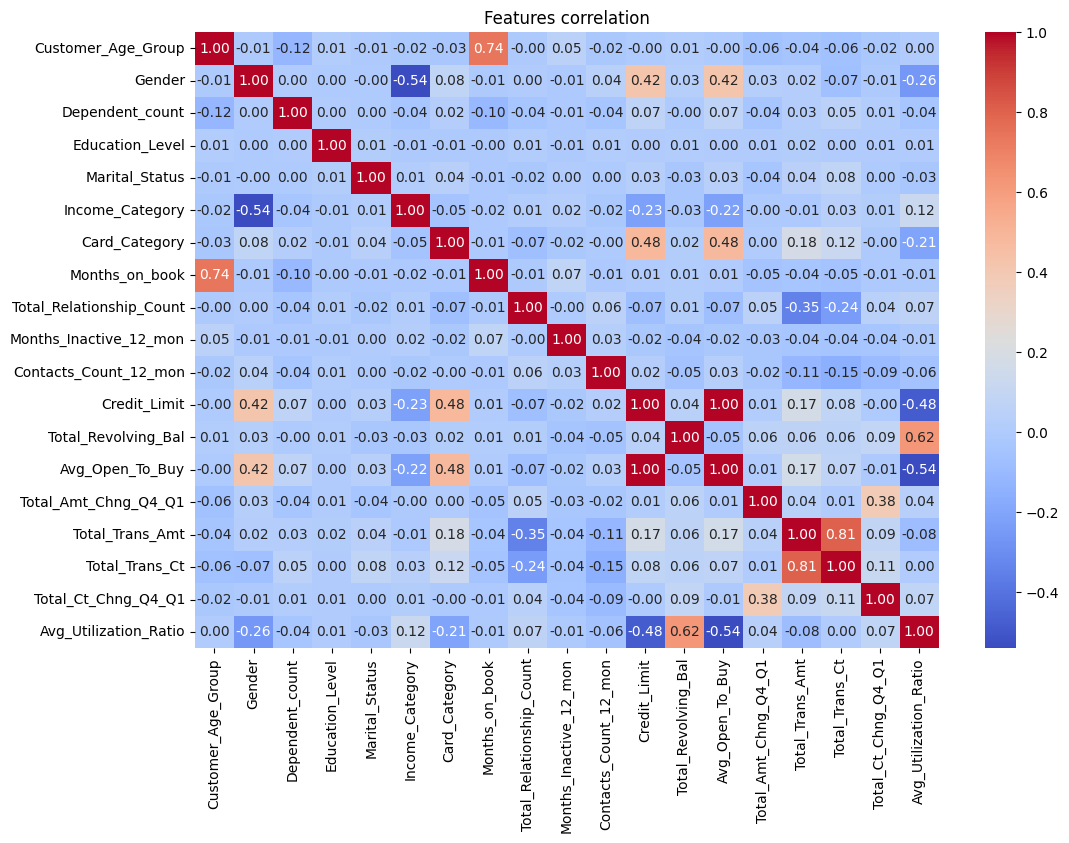

In [7]:
#Correlation matrix
features = ['Customer_Age_Group', 'Gender', 'Dependent_count',
            'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
            'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
            'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
            'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
# fet = ['Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
#             'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
#             'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
#             'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
correlation_matrix = df[features].corr()

#Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt= '.2f')
plt.title('Features correlation')
plt.show()


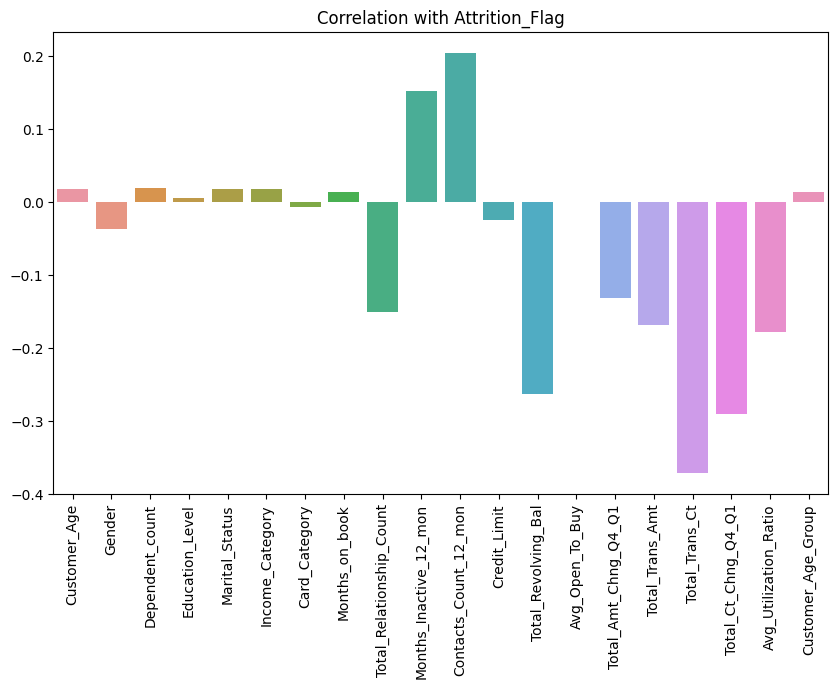

In [8]:
# Compute the correlation between labels and features
corr_with_labels = df.corr()['Attrition_Flag'].drop('Attrition_Flag')

# Plot the correlation values as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_labels.index, y=corr_with_labels.values)
plt.title('Correlation with Attrition_Flag')
plt.xticks(rotation=90)
plt.show()

## 

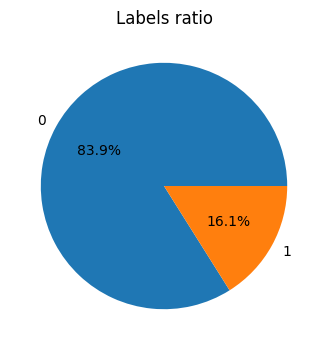

In [9]:
#Why oversampling?
labels_count = df['Attrition_Flag'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(labels_count, labels=labels_count.index, autopct= "%1.1f%%")
plt.title("Labels ratio")
plt.show()

In [28]:
#Features and labels split
removed_feature = ["Credit_Limit", 'Avg_Utilization_Ratio', 'Card_Category']
selected_feature = [f for f in features if f not in removed_feature]

X = df[selected_feature]
y = df['Attrition_Flag']

#Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Oversampling
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(selected_feature)

['Customer_Age_Group', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']


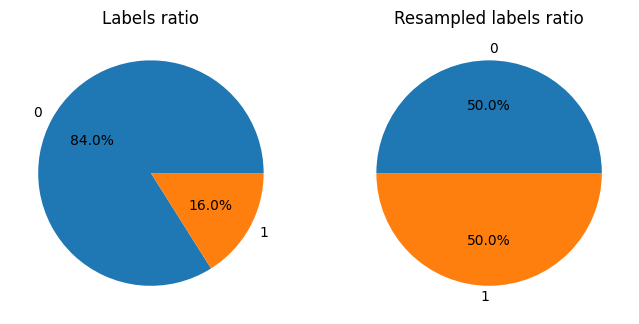

In [11]:
label_cnt = y_train.value_counts()
res_label_cnt = y_train_res.value_counts()

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.pie(label_cnt, labels=label_cnt.index, autopct= "%1.1f%%")
plt.title("Labels ratio")

plt.subplot(1,2,2)
plt.pie(res_label_cnt, labels=res_label_cnt.index, autopct= "%1.1f%%")
plt.title("Resampled labels ratio")
plt.show()

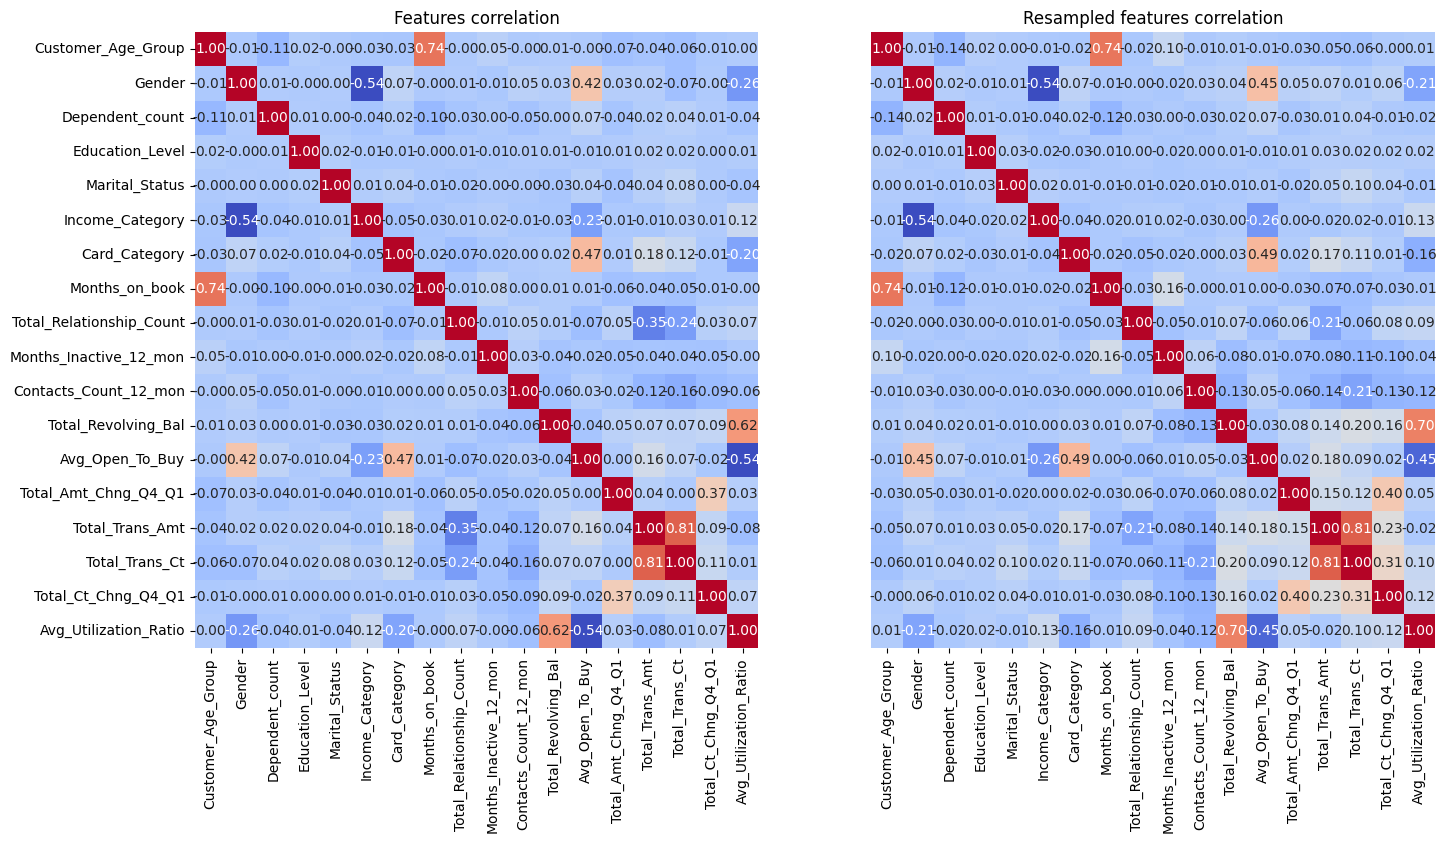

In [12]:
res_corr_matrix = X_train_res[selected_feature].corr()
corr_matrix = X_train[selected_feature].corr()

#Visualization
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt= '.2f', cbar=False)
plt.title('Features correlation')

plt.subplot(1, 2, 2)
sns.heatmap(res_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', yticklabels=False, cbar=False)
plt.title('Resampled features correlation')

plt.show()

# Train and test model

In [32]:
classifiers = [
    RandomForestClassifier(random_state = 42),
    SVC(random_state = 42),  
    GradientBoostingClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
]

for classifier in classifiers:
    #Train model
    classifier.fit(X_train, y_train)
    #Make Prediction
    y_pred = classifier.predict(X_test)
    #Print result
    classifier_name = type(classifier).__name__
    print(f"{classifier_name}",
          classification_report(y_test, y_pred),
          "-----------------------------", sep="\n")
    
    #Train model with resampled data
    classifier.fit(X_train_res, y_train_res)
    #Make Prediction
    y_pred = classifier.predict(X_test)

    #Print result
    classifier_name = type(classifier).__name__
    print(f"resampled {classifier_name}",
          classification_report(y_test, y_pred),
          "-----------------------------", sep="\n")

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1699
           1       0.93      0.83      0.88       327

    accuracy                           0.96      2026
   macro avg       0.95      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026

-----------------------------
resampled RandomForestClassifier
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1699
           1       0.86      0.87      0.86       327

    accuracy                           0.96      2026
   macro avg       0.92      0.92      0.92      2026
weighted avg       0.96      0.96      0.96      2026

-----------------------------
SVC
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1699
           1       0.88      0.31      0.46       327

    accuracy                           0.88      2026
   macro

<BarContainer object of 18 artists>

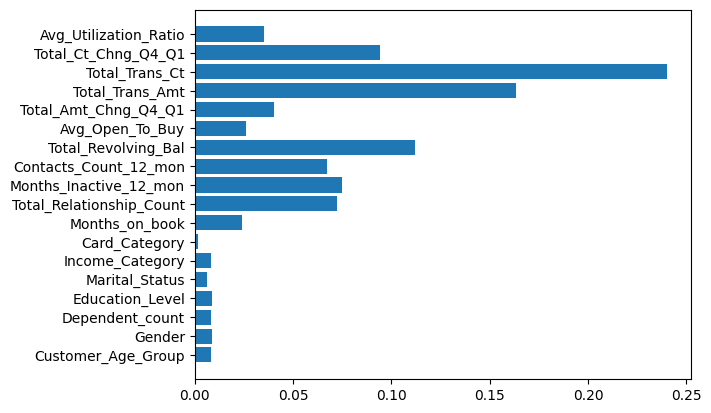

In [14]:
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)

# Find the index of the most important feature
importance = rf.feature_importances_
most_important_feature_index = importance.argmax()
most_important_feature_name = X_train.columns[most_important_feature_index]

plt.barh(selected_feature, importance)

Text(0.5, 1.0, 'Resampled Total_Ct_Chng_Q4_Q1 vs. Attrition Flag')

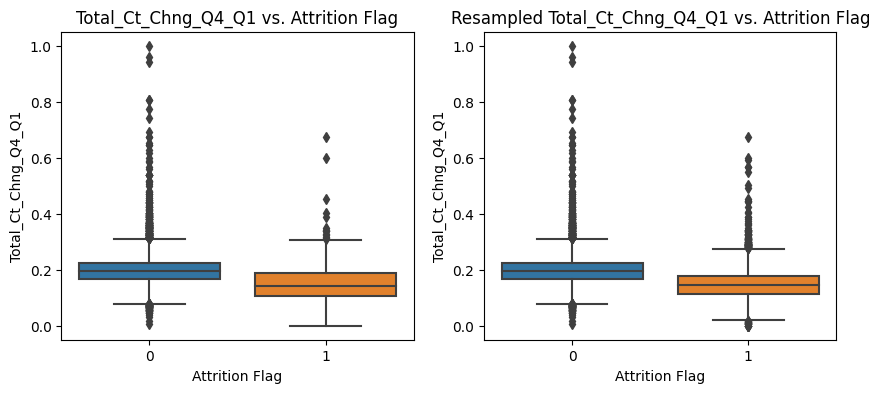

In [15]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.boxplot(x=y_train, y=X_train['Total_Ct_Chng_Q4_Q1'])
plt.xlabel('Attrition Flag')
plt.ylabel('Total_Ct_Chng_Q4_Q1')
plt.title('Total_Ct_Chng_Q4_Q1 vs. Attrition Flag')

plt.subplot(1, 2, 2)
sns.boxplot(x=y_train_res, y=X_train_res['Total_Ct_Chng_Q4_Q1'])
plt.xlabel('Attrition Flag')
plt.ylabel('Total_Ct_Chng_Q4_Q1')
plt.title('Resampled Total_Ct_Chng_Q4_Q1 vs. Attrition Flag')

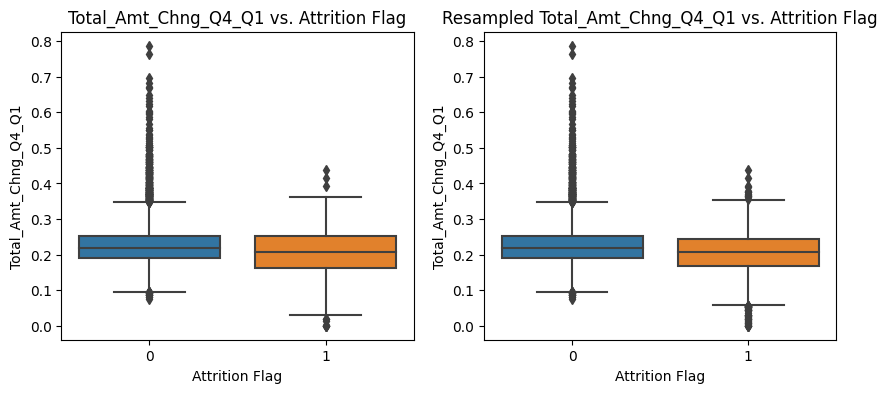

In [16]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.boxplot(x=y_train, y=X_train['Total_Amt_Chng_Q4_Q1'])
plt.xlabel('Attrition Flag')
plt.ylabel('Total_Amt_Chng_Q4_Q1')
plt.title('Total_Amt_Chng_Q4_Q1 vs. Attrition Flag')

plt.subplot(1, 2, 2)
sns.boxplot(x=y_train_res, y=X_train_res['Total_Amt_Chng_Q4_Q1'])
plt.xlabel('Attrition Flag')
plt.ylabel('Total_Amt_Chng_Q4_Q1')
plt.title('Resampled Total_Amt_Chng_Q4_Q1 vs. Attrition Flag')

plt.show()

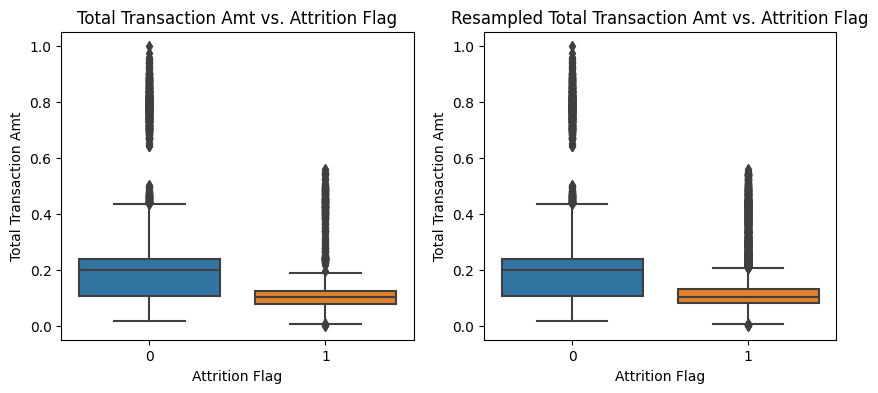

In [17]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.boxplot(x=y_train, y=X_train['Total_Trans_Amt'])
plt.xlabel('Attrition Flag')
plt.ylabel('Total Transaction Amt')
plt.title('Total Transaction Amt vs. Attrition Flag')

plt.subplot(1, 2, 2)
sns.boxplot(x=y_train_res, y=X_train_res['Total_Trans_Amt'])
plt.xlabel('Attrition Flag')
plt.ylabel('Total Transaction Amt')
plt.title('Resampled Total Transaction Amt vs. Attrition Flag')

plt.show()

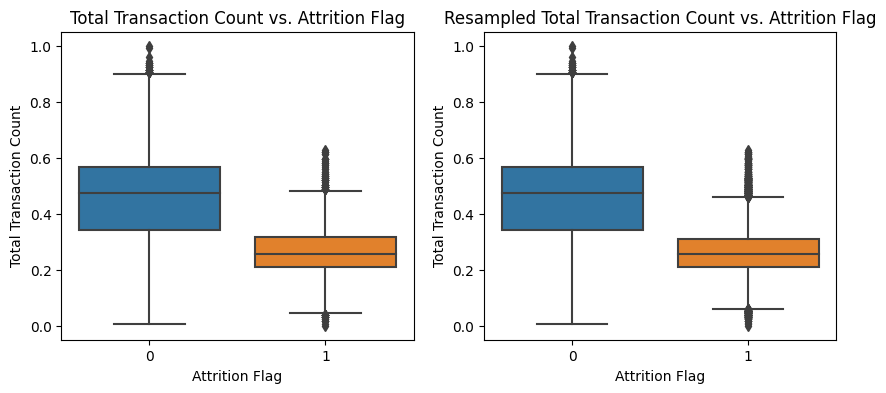

In [18]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.boxplot(x=y_train, y=X_train['Total_Trans_Ct'])
plt.xlabel('Attrition Flag')
plt.ylabel('Total Transaction Count')
plt.title('Total Transaction Count vs. Attrition Flag')

plt.subplot(1, 2, 2)
sns.boxplot(x=y_train_res, y=X_train_res['Total_Trans_Ct'])
plt.xlabel('Attrition Flag')
plt.ylabel('Total Transaction Count')
plt.title('Resampled Total Transaction Count vs. Attrition Flag')

plt.show()

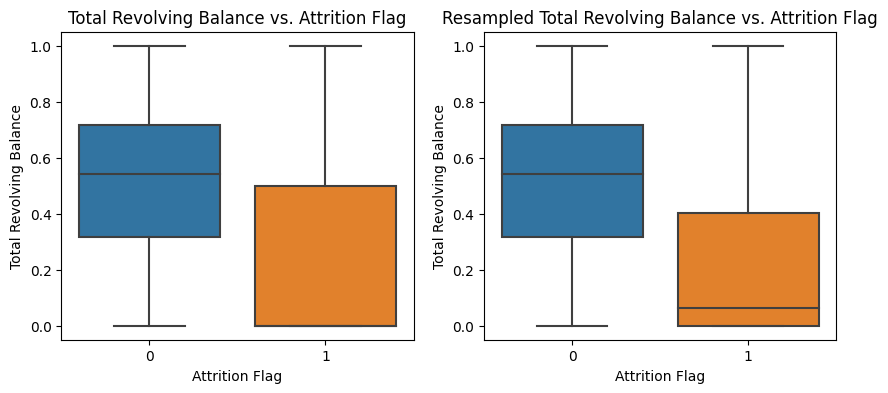

In [19]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.boxplot(x=y_train, y=X_train['Total_Revolving_Bal'])
plt.xlabel('Attrition Flag')
plt.ylabel('Total Revolving Balance')
plt.title('Total Revolving Balance vs. Attrition Flag')

plt.subplot(1, 2, 2)
sns.boxplot(x=y_train_res, y=X_train_res['Total_Revolving_Bal'])
plt.xlabel('Attrition Flag')
plt.ylabel('Total Revolving Balance')
plt.title('Resampled Total Revolving Balance vs. Attrition Flag')

plt.show()

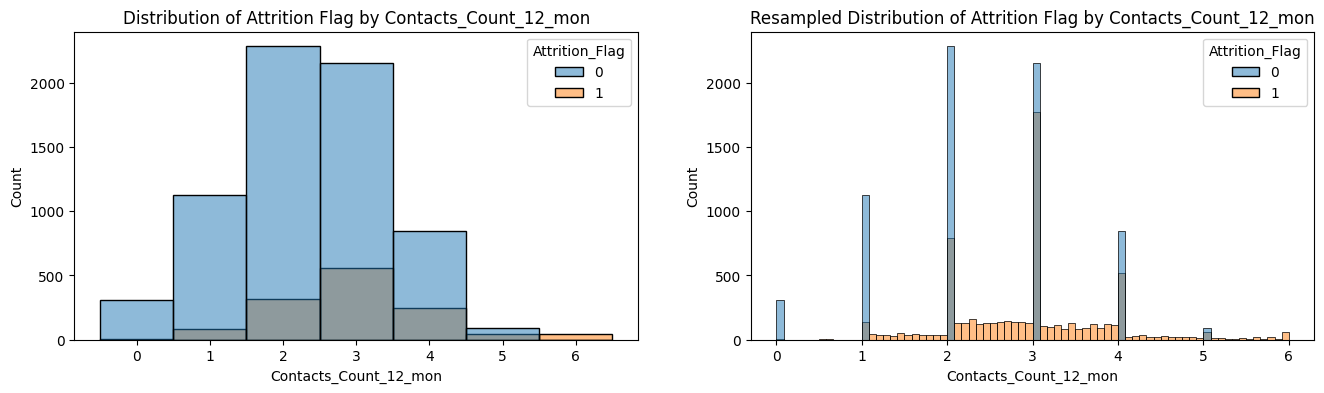

In [20]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sns.histplot(x=X_train['Contacts_Count_12_mon']*6, hue=y_train, discrete=True)
plt.xlabel("Contacts_Count_12_mon")
plt.ylabel("Count")
plt.title("Distribution of Attrition Flag by Contacts_Count_12_mon")

plt.subplot(1, 2, 2)
sns.histplot(x=X_train_res['Contacts_Count_12_mon']*6, hue=y_train_res)
plt.xlabel("Contacts_Count_12_mon")
plt.ylabel("Count")
plt.title("Resampled Distribution of Attrition Flag by Contacts_Count_12_mon")
plt.show()

<BarContainer object of 18 artists>

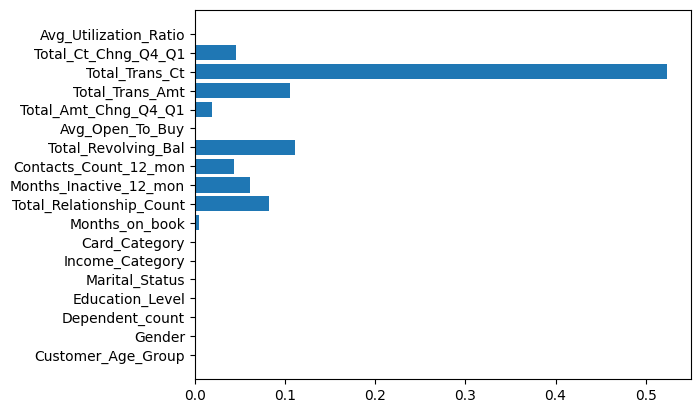

In [21]:
xg = GradientBoostingClassifier()
xg.fit(X_train_res, y_train_res)
plt.barh(selected_feature, xg.feature_importances_)